# TD - Introduction à Numpy & Matplotlib 

L'objectif de ce TD est de se familiariser avec les principales librairies numériques de Python, à savoir [numpy](https://docs.scipy.org/doc/numpy/reference/), [scipy](https://docs.scipy.org/doc/scipy/reference/) et [matplotlib](http://www.matplotlib.org). 

Vous importerez ces bibliothèques avec les instructions suivantes:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

<font color="blue">Les parties notées « **Pour aller plus loin** » sont à traiter chez vous ou à la fin du TP si le temps le permet.</font>

**IMPORTANT:** n'oubliez pas d'ajouter des commentaires à votre code.

## Rappels Matplotlib

La fonction de haut niveau `plt.subplots` permet de générer, dans son utilisation la plus simple, une figure (`fig`) et un 
système d'axe (`ax`):

```python
fig, ax = plt.subplots(1, 1)  # Figure à 1×1=1 syst. d'axes
```

* `fig` est un objet de type `Figure` contenant un (ou plusieurs) système(s) d'axes, et pouvant être affiché ou sauvegardé (p.ex. au format PDF ou PNG);
* `ax` est un objet de type `Axes` disposant de nombreuses méthodes de visualisation (`plot`, `scatter`, `imshow`, `hist`, etc.), et de personalisation (`xlabel`, `xscale`, `title`, `legend`, `grid`, etc.).
  
  <img src="https://matplotlib.org/_images/anatomy.png" alt="Anatomie d'une figure." width="400">

## Tracé de courbes (1D)

### Figure de diffraction par une fente fine

La répartition de l'intensité lumineuse d'une onde monochromatique diffractée par une fente fine de largeur $a$ est:

$$
I(\theta) = I_0 \,\sin_c^2\left(\frac{\pi a \sin \theta}{\lambda}\right)
$$
où $\lambda$ est la longeur d'onde, $\theta$ l'angle au centre et $I_0$ l'intensité au centre de la figure de diffraction.

Nous allons tracer l'allure de la fonction $I/I_0$ en fonction de $x = (\pi a \sin \theta)/\lambda$.

* Générer un vecteur $x$ de 200 points entre $-2\pi$ et $2\pi$ (`numpy.linspace`)
* Génerer le vecteur $y = \sin_c(x)$ (`numpy.sinc`)

In [2]:
x = np.linspace(-2 * np.pi, +2 * np.pi, 200)
y = np.sinc(x)

* Dans une figure à un système d'axe, tracer conjointement $y(x)$ et $y^2(x)$.
* Agrémenter la figure pour la rendre compréhensible (titre de la figure et des axes, légende).
* Sauvegarder la figure au format PDF (`plt.savefig`)

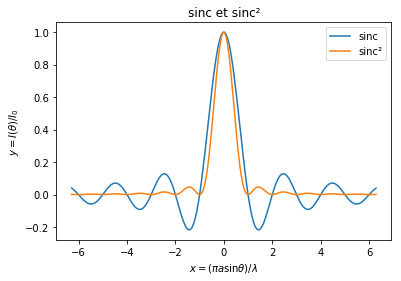

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, label='sinc')       # Tracé y(x)
ax.plot(x, y**2, label=u'sinc²')  # Tracé y²(x)
ax.set(title=u'sinc et sinc²',    # Titre et intitulé des axes
       xlabel=r'$x = (\pi a \sin\theta)/\lambda$', ylabel=r'$y = I(\theta)/I_0$')
ax.legend()                       # Légende
plt.savefig("diffraction.pdf")    # Sauvegarde au format PDF

<font color="blue"> 
**Pour aller plus loin:**
1. Modifier le code pour prendre en compte une largeur de fente et une longueur d'onde précise.
2. En choisissant différentes valeurs de $a$ et $\lambda$, tracer sur une même figure l'évolution de la figure de diffraction:
   * pour des largeurs de fentes différentes, à une seule longueur d'onde,  
   * pour différentes longueurs d'onde, avec une fente de largeur fixée. 
</font>

### Trèfles de Habenicht (courbe polaire)

Les trèfles de Habenicht sont des courbes «ornementales» en représentation polaire, d'équation
$$
r_n(\theta) = 1 + \cos n\theta + \sin^2 n\theta, \qquad n\in \mathbb{N}^*
$$
    
* Définir une fonction `habenicht(n, theta)` permettant de calculer $r_n(\theta)$.

In [4]:
def habenicht(n, theta):
    
    return 1 + np.cos(n * theta) + np.sin(n * theta) ** 2

* Générer un vecteur $\theta$ de 200 points entre 0 et $2\pi$.
* Génerer le tableau 2D, de format $(3, 100)$, des valeurs de $r_n(\theta)$ pour $n = 3, 5, 7$.

  Remarque: une liste en compréhension pourra être utilisée. Vérifier le format du tableau créé.

In [5]:
theta = np.linspace(0, 2 * np.pi, 100)

rn = np.array([ habenicht(n, theta) for n in (3, 5, 7) ])  # Liste en compréhension, de format (3, len(theta))
print(rn.shape)

(3, 100)


Pour tracer une courbe en coordonnées polaires, il faut un système d'axes adapté:

```python
fig = plt.figure()                                   # Création de la figure seule
ax = fig.add_subplot(1, 1, 1, projection='polar')    # Ajout d'un syst. d'axes en polaire
```

* Tracer dans un même système d'axes les différentes courbes polaires $r_{n=3,5,7}(\theta)$.

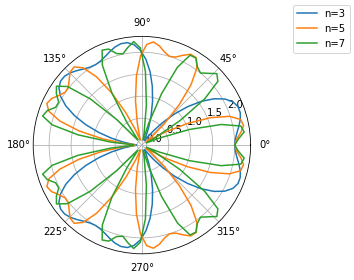

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='polar')
ax.plot(theta, rn[0], label='n=3')
ax.plot(theta, rn[1], label='n=5')
ax.plot(theta, rn[2], label='n=7')
fig.legend();

### Rappels sur les complexes

Python et numpy gèrent nativement les complexes (le nombre imaginaire pur est noté $j$). Pour un complexe $z = a + bj = \rho\,e^{j\theta}$, on a 
* `z = a + b * 1j` ou `z = rho * np.exp(1j * theta)`
* partie réelle: `a = np.real(z)`, 
* partie imaginaire: `b = np.imag(z)`, 
* module: `rho = np.abs(z)`,
* argument: `theta = np.angle(z)` (en radians).

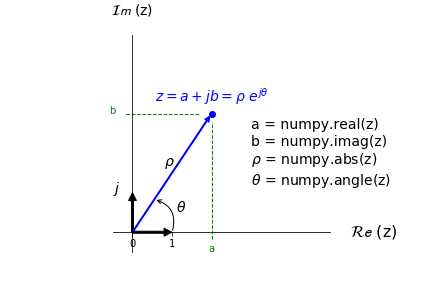

### Filtre passe-haut (diagramme de Bode)

La fonction de transfert $H$ d'un filtre est définie comme le rapport entre le signal de sortie $S$ et le signal d'entrée $E$: $H = S/E$. $H$ est une grandeur complexe fonction de la pulsation, dont le module donne le facteur d'atténuation/amplification (*gain*), et l'argument le déphasage entre les signaux de sortie et d'entrée (*phase*).

Un filtre «passe-haut» permet de ne laisser passer que les signaux dont la pulsation $\omega = 2\pi f$ est supérieure à une valeur de coupure $\omega_0$ et d'atténuer les signaux de fréquence inférieure.

Nous voulons étudier le filtre passe-haut du 2e ordre dont la fonction de transfert complexe est:
$$
H_Q^{PH2}(x) = \frac{-x^2}{1 - x^2 + j x/Q}
$$
où $x = \omega/\omega_0$ est la pulsation réduite, et $Q>0$ le facteur de qualité.

Nous allons pour cela tracer son *diagramme de Bode*, constitué de deux graphiques représentant le comportement fréquentiel (en échelle logarithmique) de son gain (généralement exprimé en dB) et de sa phase. 

* Définir une fonction `H_PH2(x, Q=1)` retournant la fonction de transfert complexe précédente (on choisit un facteur de qualité $Q=1$ par défaut).
* Définir une fonction `gain_dB(H)` retournant le gain en dB de la fonction de transfert complexe `H`: $G_{dB} = 20\log_{10} |H|$.  Pour la phase, utiliser directement la fonction `numpy.angle`.

In [7]:
def H_PH2(x, Q=1):
    """
    Fonction de transfert complexe d'un filtre passe-haut du 2e ordre.
    
    x: pulsation réduite
    Q: facteur de qualité
    """
    
    return -x**2 / (1 - x**2 + 1j * x / Q)

def gain_dB(H):
    "Gain en dB."
    
    return 20 * np.log10(np.abs(H))

* Générer un vecteur 𝑥 de 100 points disposés logarithmiquement entre 0.1 et 10 (`numpy.logspace`).
* Tracer dans 2 systèmes d'axes superposés (`subplots(2, 1)`) le gain (en dB) et la phase (en rad.) du filtre $H_Q^{PH2}(x)$ pour $Q=1/5$, $Q=1$ et $Q=5$.

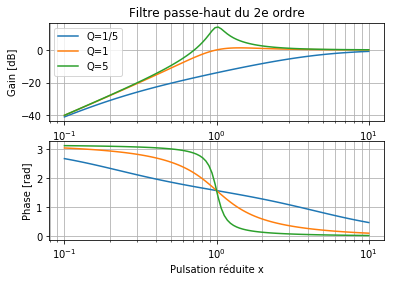

In [8]:
x = np.logspace(-1, 1, 100)

fig, (ax1, ax2) = plt.subplots(2, 1)

# Gain [dB]
ax1.plot(x, gain_dB(H_PH2(x, Q=0.2)), label='Q=1/5')
ax1.plot(x, gain_dB(H_PH2(x, Q=1)), label='Q=1')
ax1.plot(x, gain_dB(H_PH2(x, Q=5)), label='Q=5')

# Phase [rad]
ax2.plot(x, np.angle(H_PH2(x, Q=0.2)))
ax2.plot(x, np.angle(H_PH2(x, Q=1)))
ax2.plot(x, np.angle(H_PH2(x, Q=5)))

ax1.set(ylabel='Gain [dB]', xscale='log', title='Filtre passe-haut du 2e ordre')
ax2.set(xlabel=u'Pulsation réduite x', xscale='log', ylabel='Phase [rad]')
ax1.legend()
ax1.grid(which='both')
ax2.grid(which='both')

### Étalonnage d'un monochromateur avec une lampe à vapeur de mercure

Un monochromateur est un dispositif optique permettant de mesurer ou de selectionner une longue d'onde précise d'un rayonnement. Il est constitué d'un système dispersif qui peut être un prisme ou un réseau. L'étalonnage d'un monochromateur a pour objectif de déterminer la relation $\lambda = f(p)$ entre la position $p$ du système dispersif (p.ex. un angle) et la longueur d'onde $\lambda$ du rayonnement.

Le fichier `etalonnageMonochromateur.txt` contient les données $p, \lambda, \delta p$ obtenues lors de l'étalonnage d'un monochromateur à l'aide d'une lampe à vapeur de mercure dont les longueurs d'onde sont connues.

* Ouvrir le fichier `etalonnageMonochromateur.txt` avec un éditeur de texte ou jupyter pour déterminer la strcuture du fichier (nombre, séparation, contenu des colonnes, commentaires, etc.).
* Connaissant la structure du fichier, charger les données dans un tableau numpy avec `numpy.loadtxt()`. Quel est le format du tableau résultant?

In [9]:
# lecture des données à partir d'un fichier "classique" (séparation par des espaces, commentaires '#')
data = np.loadtxt('etalonnageMonochromateur.txt')
print(data.shape)

(6, 3)


* Tracer les données $\lambda = f(p)$ dans un graphique.

  *Remarque:* utiliser les méthodes de `slicing` pour accéder aux colonnes adéquates du tableau précédent.

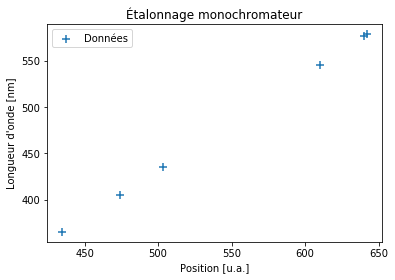

In [10]:
position = data[:, 0]   # 1e colonne
wavelength = data[:,1]  # 2e colonne

fig, ax = plt.subplots(1, 1)
ax.scatter(position, wavelength, marker='+', s=50, label=u'Données')
ax.set(title=u'Étalonnage monochromateur',
       xlabel='Position [u.a.]', ylabel = "Longueur d'onde [nm]")
ax.legend();

Étalonner le monochromateur consiste à déterminer une relation analytique approchant «au mieux» la relation entre les valeurs $(p_i, \lambda_i)$ observée avec la lampe d'étalonnage. Une fois cette relation établie, elle permet de prédire la longueur d'onde correspondant à une position $p$ quelconque (dans le domaine de validité de la relation d'étalonnage). 

Compte tenu de la répartition linéaire des points $(\lambda_i, p_i)$, la relation d'étalonnage sera obtenue en ajustant les données avec une [régression linéaire](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) $\lambda = a p + b$ :
```python
a, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
```
Le *coefficient de corrélation linéaire* $r$ (`r_value`) indique le degré de corrélation linéaire entre les deux variables ($-1 \leq r \leq +1$, on regarde en général le *coeff. de détermination* $r^2$). (Les deux autres paramètres `p_value` et `std_err` ne sont pas considérés ici.)

* Déterminer et afficher l'équation de la droite d'étalonnage $\lambda = a p + b$, ainsi que son coefficient de détermination $r^2$.

In [11]:
a, b, r_value, p_value, std_err = scipy.stats.linregress(position, wavelength)
print("Éq. de la droite d'étalonnage: lambda = {:.3f} position {:+.3f} (r² = {:.3f})".format(a, b, r_value**2))

Éq. de la droite d'étalonnage: lambda = 1.035 position -85.632 (r² = 1.000)


* Ajouter la droite d'étalonnage $\lambda = a p + b$ à la figure précedente.  Les longueurs d'onde seront calculées pour des valeurs de $p$ comprises entre 400 et 700.

  *Remarque:* en mode non-interactif(`%matplotlib inline`), si une figure `fig` existe déja, il est nécessaire de la réafficher (`fig`) après modification. En mode intéractif (`%matplotlib notebook`), la figure est automatiquement mise à jour au fur et à mesure.

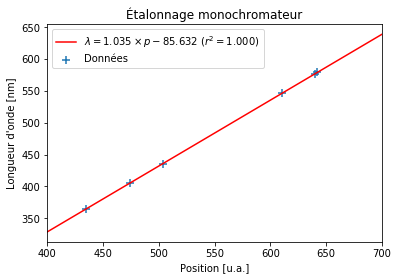

In [12]:
p = np.linspace(400, 700, 2)
ax.plot(p, a * p + b, color='r', label=r"$\lambda = {:.3f}\times p {:+.3f}$ ($r^2 = {:.3f}$)".format(a, b, r_value**2))
ax.legend();
ax.set(xlim=(400, 700))
fig

<font color="blue">**Pour aller plus loin:** 
Ajouter sur la figure les [barres d'erreur](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) $\delta p$ sur la position $p$. En toute rigueur, il faudrait en tenir compte dans l'ajustement de la loi d'étalonnage (*moindres carrés pondérés*).

Pour la lisibilité, vous devrez multiplier les barres d'erreur $\delta p$ par un facteur multiplicatif pour les visualiser distinctement sur la figure. Ajouter cette information sur la figure.
</font>

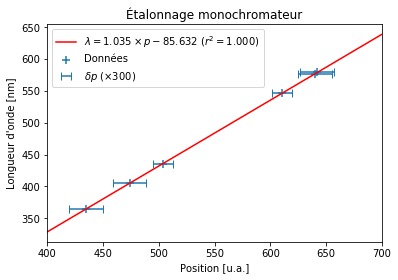

In [13]:
errFactor = 300
delta_p = data[:,2] * errFactor 

ax.errorbar(position, wavelength, xerr=delta_p, fmt='none', ecolor='C0', capsize=4, label=r"$\delta p$ ($\times{})$".format(errFactor))
ax.legend()
fig

## Le quartet d'Anscombe

Nous allons charger et étudier 4 jeux de données $(x, y)$, d'abord en calculant des statistiques descriptives (moyennes, écarts type, etc.) puis en les visualisant.

* Utiliser la fonction `numpy.loadtxt` pour charger les données du fichier `anscombe.dat` disponible depuis Claroline. Quel format (*shape*) a le tableau de retour?

In [14]:
data = np.loadtxt('anscombe.dat')
print(data.shape)

(11, 8)


* Transformer le tableau précédent en 4 jeux de données `j1`, `j2`, `j3` et `j4` de format $(11, 2)$.

In [15]:
j1, j2, j3, j4 = data[:, 0:2], data[:, 2:4], data[:, 4:6], data[:, 6:8]
print(j1.shape)

(11, 2)


* Pour chacun des 4 jeux de données, calculer et afficher (avec 2 chiffres après la virgule) les statistiques suivantes:
  - les moyennes de $x$ et $y$ (`numpy.mean`),
  - les écarts-type de $x$ et $y$ (`numpy.std`),
  - le coefficient de corrélation entre $x$ et $y$ (`scipy.stats.pearsonr`),
  - l'équation de la droite de régression linéaire $y = ax + b$ (`scipy.stats.linregress`).
  
  Que constatez-vous? Que pouvez-vous en déduire?

In [16]:
for i, ji in enumerate([j1, j2, j3, j4], start=1):
    print(" Jeu #{} ".format(i).center(34, '='))
    x, y = ji.T
    print("Moyennes:           x={:.2f}, y={:.2f}".format(np.mean(x), np.mean(y)))
    print("Écarts-type:        x={:.2f}, y={:.2f}".format(np.std(x), np.std(y)))
    r, _ = scipy.stats.pearsonr(x, y)
    print("Coeff. corrélation: r={:.2f}".format(r))
    # slope, intercept, r_value, p_value, std_err
    a, b, _, _, _ = scipy.stats.linregress(x, y)
    print("Rég. linéaire:      a={:.2f}, b={:.2f}".format(a, b))

============= Jeu #1 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00
============= Jeu #2 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00
============= Jeu #3 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00
============= Jeu #4 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00


* Au sein d'une même figure (`subplots(2, 2)`), tracer les 4 jeux de données $(x_i,y_i)$ (`plot(x, y, 'bo')`), en y ajoutant à chaque fois la droite de régression linéaire (`plot(x, a*x+b, 'r-')`). 

  Que conclure?

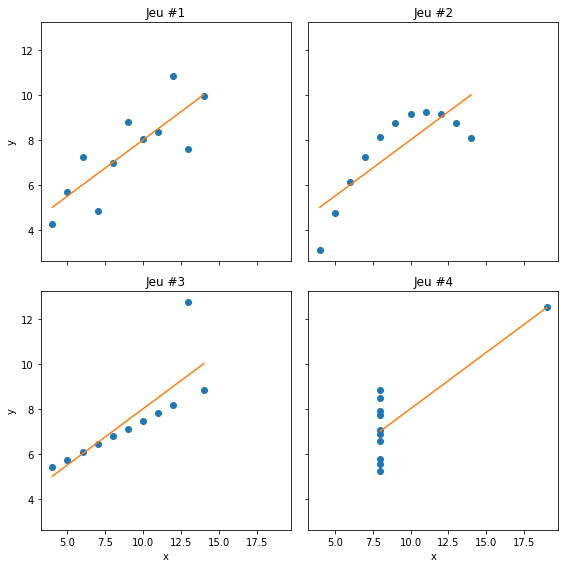

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)  # retourne un tableau axs de format (2, 2)

for i, ji in enumerate([j1, j2, j3, j4]):
    x, y = ji.T
    a, b, _, _, _ = scipy.stats.linregress(x, y)
    xx = np.array([x.min(), x.max()])
    
    axs[i//2, i%2].plot(x, y, ls='none', marker='o')
    axs[i//2, i%2].plot(xx, a*xx + b)
    axs[i//2, i%2].set(title="Jeu #{}".format(i + 1))

[ ax.set(xlabel='x') for ax in axs[1] ]
[ ax.set(ylabel='y') for ax in axs[:, 0] ]
fig.tight_layout()